## Esercitazione del 20 Maggio 2025

# Esercizio 1

Scrivere un codice Python per l'addestramento di una rete MLP  per risolvere un problema di regressione. La rete ha la seguente architettura: un layer di input formato da un solo neurone e un layer di output formato da un solo neurone.

**Algoritmo di addestramento:**

Utilizzeremo l'algoritmo di ottimizzazione Batch Gradient Descent con passo di apprendimento learning_rate per aggiornare i pesi della rete durante l'addestramento.

## Descrizione del problema:

Consideriamo un dataset di coppie (x, y), dove x è un valore di input scalare e y è il valore di output desiderato. La rete MLP deve apprendere la relazione tra x e y in modo da poter prevedere y per nuovi valori di x.

-   Implementare la  funzione forward_propagation che calcola    l'output della rete per un dato input x.
-   Implementare la  funzione backward_propagation per calcolare il gradiente della funzione di perdita rispetto ai pesi della rete ed aggiornare i pesi con il metodo del  Gradient Descent.
       

    

Addestrare la rete:

-     Caricare un dataset di coppie (x, y).
-     Inizializzare i pesi della rete con valori casuali.
-     Iterare su un numero definito di epoche:
        Per ogni campione di training (x, y):
          -  Calcolare l'output previsto y_pred
             (forward_propagation).
        Calcolare l'errore MSE (np.mean(0.5*(y_pred - y)**2)
         -Calcolare il gradiente della funzione Costo
           rispetto ai pesi (backward_propagation).
         -Aggiornare i pesi della rete utilizzando
          l'algoritmo di Batch Gradient Descent.

   
-    Sperimentare con diversi valori di learning rate e numero di
     epoche per ottimizzare le prestazioni della rete.

-    Visualizzare il grafico della Cost-Function in funzione delle epoche

-    Usa la funzione di attivazione RELU.

Valutare le prestazioni della rete:
-    Su un set di dati di test e  Visualizzare i risultati ottenuti.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
seed=11
random.seed(seed)
np.random.seed(seed)

def relu(x):
  """

  Argomenti:
    x: Valore di input.

  Restituisce:
    Valore di output della funzione ReLU.
  """
  return np.where(x >= 0, x, 0)

def relu_derivative(x):
  """
  Funzione per calcolare la derivata vettoriale della funzione ReLU.

  Argomenti:
    x: Array di input.

  Restituisce:
    Array contenente la derivata della funzione ReLU per ogni elemento in x.
  """
  return np.where(x >= 0, 1, 0)


In [3]:
def forward_propagation(x,w,b):
    a=w*x+b
    z=relu(a)
    return z,a


In [13]:
def backward_propagation(y_pred, y, x, a, w, b, learing_rate):
    delta_1=(y_pred -y)-relu_derivative(a)
    w=w-learing_rate*np.sum(delta_1*x)/x.shape[0]
    b=b-learing_rate*np.sum(delta_1)/x.shape[0]

    return w,b

In [7]:
#funzione costo
def mse(y_pred, y_true):
    return np.mean(0.5*(y_pred -y_true)**2)

In [9]:
#Dati di esempio
x=np.linspace(0.0,10, 50)
y=2*x+5+0.4*np.random.normal(0,2,50)
#Iniziallizzo i pesi 
w=np.random.rand()
b=np.random.rand()

In [25]:
#iperparametri
epochs=5000
learning_rate = 0.0005
v_loss=[]

for epoch in range(epochs):
    #FORWWARD PROPAGATION
    y_pred,a=forward_propagation(x,w,b)
    #calcolo funzione costo 
    loss=mse(y_pred,y)
    v_loss.append(loss)

    #Aggiornamento dei pesi e del bias con il metodo del batch grandient descent
    w,b =backward_propagation(y_pred, y, x, a, w, b, learning_rate)

#predizione su nuovi dati 
xnew = np.linspace(0.0,10,100)
y_pred,a=forward_propagation(xnew,w,b)

plt.plot(x,y,'o', xnew,y_pred, 'r-')
plt.show()
plt.semilogy(loss)

ValueError: operands could not be broadcast together with shapes (3,) (50,) 

# Esercizio 2

Risolvere lo stesso problema cambiando l'architettura della rete:

La rete MLP avrà la seguente struttura:

    1 layer di input formato da un solo neurone che riceve il valore di x
    2 hidden layers ognuno formato da un solo neurone con funzione di attivazione ReLU
    1 layer di output formato da un solo neurone che produce il valore previsto di y

In [39]:
def fpr(x,w,b):
    a1=w[0]*x+b[0]
    z1=relu(a1)

    a2=w[1]*x+b[1]
    z2=relu(a2)

    a3=w[2]*x+b[2]
    z3=relu(a3)

    return z3,a1,a2,a3,z1,z2

def bpr (y_pred, y, w, b, a1, a2, a3, z1, z2, x, learning_rate, nT):
    delta_3 =(y_pred - y)*relu_derivative(a3)
    delta_2=delta_3*w[2]*relu_derivative(a2)
    delta_1=delta_2*w[1]*relu_derivative(a1)

    #Aggiornamento dei pesi
    w[2] = w[2]-learning_rate*np.sum(delta_3*z2)/nT
    w[1]=w[1]-learning_rate*np.sum(delta_2*z1)/nT
    w[0]=w[0] - learning_rate*np.sum(delta_1*x)/nT

    #Aggiornamento bias
    b[2]= b[2]-learning_rate*np.sum(delta_3)/nT
    b[1]= b[1]-learning_rate*np.sum(delta_2)/nT
    b[0]= b[0]-learning_rate*np.sum(delta_1)/nT

    return w,b

In [23]:
w=np.random.randn(3)
b=np.random.randn(3)


In [43]:
nT=x.shape[0]
f_loss_1=[]

for epoch in range(epochs):
    #Predizione
    y_pred,a1,a2,a3,z1,z2 = fpr(x,w,b)
    #Calcolao la funzione costo con i pesi di partenza
    loss=mse(y_pred,y)

    w,b=bpr(y_pred,y,w,b,a1,a2,a3,z1,z2,x,learning_rate,nT)

#Predizione su nuovi dati 
xnew=np.linspace(0.0,10,100)
y_pred_new,a1,a2,a3,z1,z2 = fpr(xnew,w,b)

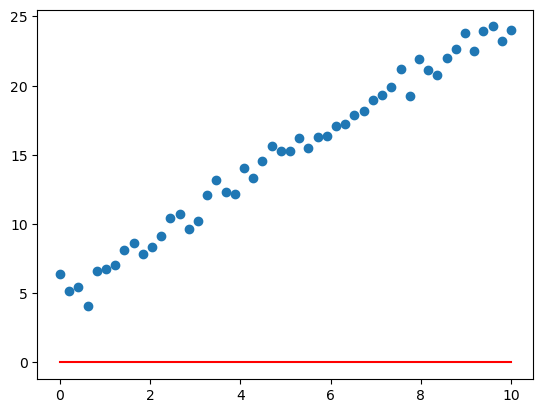

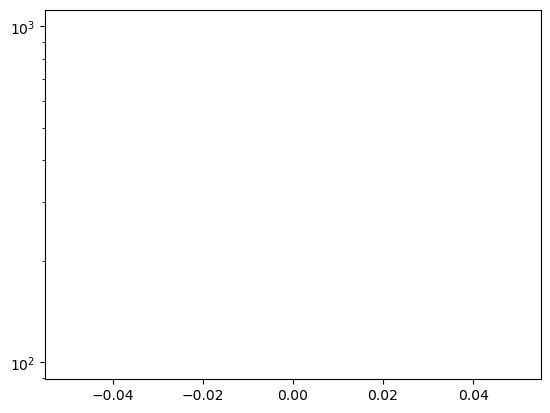

In [45]:
plt.plot(x,y,'o', xnew,y_pred_new, 'r-')
plt.show()
plt.semilogy(loss)